<h1>Classify Trees in Satellite Imagery</h1>
<img src="https://eoimages.gsfc.nasa.gov/images/imagerecords/40000/40228/moorhead_tm5_2009253.jpg" width=1000 height=400 alt="esto.nasa.gov"/>

<br>

<h2>Objective</h2>

<ul>
  <li> How to download and pre-process the <b>Trees in Satellite Imagery</b> dataset.</li>
</ul> 

<p>Tree detection can be used for applications such as vegetation management, forestry, urban planning, etc. Tree identifications are very important in terms of impending famine and forest fires.</p>

<br>

<h2>About Dataset</h2>

<p>This dataset is being used for classifying the land with class of trees or not in geospatial images.</p>

Satellite: [Sentinel - 2](https://sentinel.esa.int/web/sentinel/missions/sentinel-2)

<h3>Context</h3>

<p>The content architecture is simple. Each datum has 64x64 resolution and located under <i>tree</i> and <i>notree</i> folders.
Each folder (class) has 5200 images. So the total dataset has 10.4K images.</p>

To download the dataset, you need to have a kaggle account.

 - Dataset download link: [Kaggle](https://www.kaggle.com/datasets/mcagriaksoy/trees-in-satellite-imagery/download?datasetVersionNumber=1)
 - Dataset website: [Kaggle Trees in Satellite Imagery](https://www.kaggle.com/datasets/mcagriaksoy/trees-in-satellite-imagery)

<br>

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
  <ul>
      <li><a href="https://#unzip_data"> Unzip data</a></li>
      <li><a href="https://#libraries"> Import Libraries and Packages </a></li>
      <li><a href="https://#image_data_generator">Construct an ImageDataGenerator Instance</a></li>
      <li><a href="https://#vis_batch_img">Visualize Batches of Images</a></li>
  </ul>

  <br>

  <p>Estimated Time Needed: <strong>15 min</strong></p>

</div>

<hr>

<br>

<h2 id="unzip_data">Unzip Data</h2>
<p>After downloading the dataset, we can unzip the file.</p>

In [1]:
!unzip -q archive.zip

<h2 id="libraries">Import Libraries and Packages</h2>

<p>Before we proceed, let's import the libraries and packages that we will need to complete the rest of this lab.</p>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import ImageDataGenerator

<p>Let's define a variable that represents the path to the folder containing our data which is <code>archive.zip</code></p>

In [2]:
os.listdir('Trees in Satellite Imagery')

['Trees', 'NoTrees']

In [3]:
dataset_dir = '/content/Trees in Satellite Imagery'

<h2 id="image_data_generator"> Construct an ImageDataGenerator Instance </h2>

<p>Keras ImageDataGenerator requires images be arranged in a certain folder hierarchy, where the main directory would contain folders equal to the number of classes in your problem. You can define a standard one like this, where you are simply using the ImageDataGenerator to train your model in batches.</p>

In [4]:
data_generator = ImageDataGenerator()

<p>Next, you use the <code>flow_from_directory</code> methods to loop through the images. It is also prints a summary of it found in the directory passed.</p>

In [5]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 10400 images belonging to 2 classes.


<p>Now, to access the batches.</p>

In [6]:
first_batch = image_generator.next()
first_batch

(array([[[[ 29.,  45.,  70.],
          [ 29.,  45.,  70.],
          [ 29.,  45.,  70.],
          ...,
          [ 32.,  53.,  72.],
          [ 32.,  53.,  72.],
          [ 32.,  53.,  72.]],
 
         [[ 29.,  45.,  70.],
          [ 29.,  45.,  70.],
          [ 29.,  45.,  70.],
          ...,
          [ 32.,  53.,  72.],
          [ 32.,  53.,  72.],
          [ 32.,  53.,  72.]],
 
         [[ 29.,  45.,  70.],
          [ 29.,  45.,  70.],
          [ 29.,  45.,  70.],
          ...,
          [ 32.,  53.,  72.],
          [ 32.,  53.,  72.],
          [ 32.,  53.,  72.]],
 
         ...,
 
         [[ 32.,  53.,  72.],
          [ 32.,  53.,  72.],
          [ 32.,  53.,  72.],
          ...,
          [ 32.,  56.,  68.],
          [ 32.,  56.,  68.],
          [ 32.,  56.,  68.]],
 
         [[ 32.,  53.,  72.],
          [ 32.,  53.,  72.],
          [ 32.,  53.,  72.],
          ...,
          [ 32.,  56.,  68.],
          [ 32.,  56.,  68.],
          [ 32.,  56.,  68.

<p>As you can see, this returned the images along with their labels.</p>

In [7]:
first_batch_images = image_generator.next()[0]
first_batch_images

array([[[[117., 116., 111.],
         [117., 116., 111.],
         [117., 116., 111.],
         ...,
         [116., 122., 112.],
         [116., 122., 112.],
         [116., 122., 112.]],

        [[117., 116., 111.],
         [117., 116., 111.],
         [117., 116., 111.],
         ...,
         [116., 122., 112.],
         [116., 122., 112.],
         [116., 122., 112.]],

        [[117., 116., 111.],
         [117., 116., 111.],
         [117., 116., 111.],
         ...,
         [116., 122., 112.],
         [116., 122., 112.],
         [116., 122., 112.]],

        ...,

        [[147., 147., 145.],
         [147., 147., 145.],
         [147., 147., 145.],
         ...,
         [234., 211., 203.],
         [234., 211., 203.],
         [234., 211., 203.]],

        [[147., 147., 145.],
         [147., 147., 145.],
         [147., 147., 145.],
         ...,
         [234., 211., 203.],
         [234., 211., 203.],
         [234., 211., 203.]],

        [[147., 147., 145.],
       

<p>Following code returns the labels only.</p>

In [8]:
first_batch_labels = image_generator.next()[1]
first_batch_labels

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

<h3>Custom ImageDataGenerator</h3>

<p>You can also specify some transforms, like scaling, rotations, and flips.</p>

In [9]:
data_generator = ImageDataGenerator(
    rescale=1./255
)

In [10]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 10400 images belonging to 2 classes.


<p>However, now we explore the first batch using the <i>next</i> method</p>

In [11]:
first_batch = image_generator.next()
first_batch

(array([[[[0.1137255 , 0.1764706 , 0.27450982],
          [0.1137255 , 0.1764706 , 0.27450982],
          [0.1137255 , 0.1764706 , 0.27450982],
          ...,
          [0.1254902 , 0.20784315, 0.28235295],
          [0.1254902 , 0.20784315, 0.28235295],
          [0.1254902 , 0.20784315, 0.28235295]],
 
         [[0.1137255 , 0.1764706 , 0.27450982],
          [0.1137255 , 0.1764706 , 0.27450982],
          [0.1137255 , 0.1764706 , 0.27450982],
          ...,
          [0.1254902 , 0.20784315, 0.28235295],
          [0.1254902 , 0.20784315, 0.28235295],
          [0.1254902 , 0.20784315, 0.28235295]],
 
         [[0.1137255 , 0.1764706 , 0.27450982],
          [0.1137255 , 0.1764706 , 0.27450982],
          [0.1137255 , 0.1764706 , 0.27450982],
          ...,
          [0.1254902 , 0.20784315, 0.28235295],
          [0.1254902 , 0.20784315, 0.28235295],
          [0.1254902 , 0.20784315, 0.28235295]],
 
         ...,
 
         [[0.1254902 , 0.20784315, 0.28235295],
          [0.12549

<p>We find that the values are not integer values anymore, but scaled resolution since the original number are divided by 255.</p>

<h2 id="vis_batch_img"> Visualize Batches of Images </h2>

<p>Let write some code to visualize a batch. We will use subplots in order to make visualizing the images easier.</p>

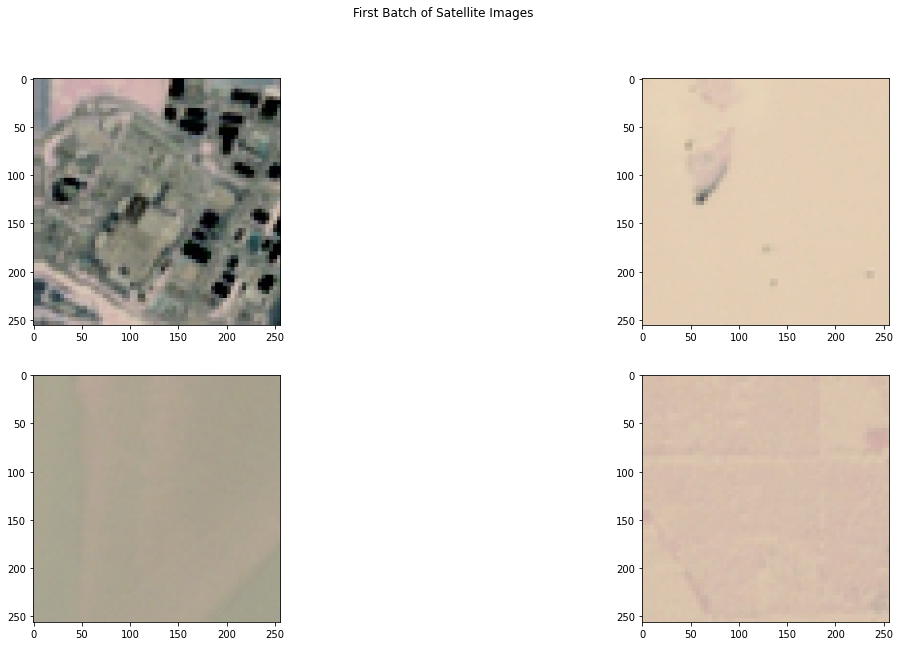

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        #image_data = first_batch_images[ind]
        image_data = first_batch_images[ind].astype(np.uint8)
        ax2.imshow((image_data * 255).astype(np.uint8))
        ind += 1

fig.suptitle('First Batch of Satellite Images') 
plt.show()

<p>Remember that batches are sampled randomly from the data. Now, let's create a plot to visualize the images in the third batch.</p>

[[[[0.45882356 0.454902   0.43529415]
   [0.45882356 0.454902   0.43529415]
   [0.45882356 0.454902   0.43529415]
   ...
   [0.454902   0.4784314  0.43921572]
   [0.454902   0.4784314  0.43921572]
   [0.454902   0.4784314  0.43921572]]

  [[0.45882356 0.454902   0.43529415]
   [0.45882356 0.454902   0.43529415]
   [0.45882356 0.454902   0.43529415]
   ...
   [0.454902   0.4784314  0.43921572]
   [0.454902   0.4784314  0.43921572]
   [0.454902   0.4784314  0.43921572]]

  [[0.45882356 0.454902   0.43529415]
   [0.45882356 0.454902   0.43529415]
   [0.45882356 0.454902   0.43529415]
   ...
   [0.454902   0.4784314  0.43921572]
   [0.454902   0.4784314  0.43921572]
   [0.454902   0.4784314  0.43921572]]

  ...

  [[0.5764706  0.5764706  0.5686275 ]
   [0.5764706  0.5764706  0.5686275 ]
   [0.5764706  0.5764706  0.5686275 ]
   ...
   [0.9176471  0.82745105 0.7960785 ]
   [0.9176471  0.82745105 0.7960785 ]
   [0.9176471  0.82745105 0.7960785 ]]

  [[0.5764706  0.5764706  0.5686275 ]
   [0.5

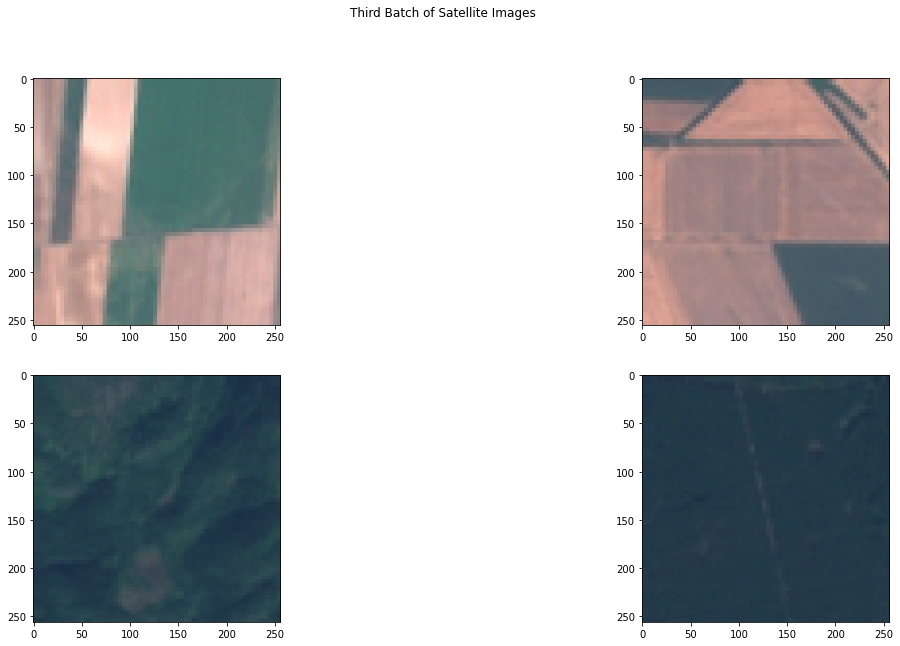

In [13]:
second_batch_images=image_generator.next()[0]
print(second_batch_images)

third_batch_images=image_generator.next()[0]
print(third_batch_images)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = third_batch_images[ind]
        #image_data = third_batch_images[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('Third Batch of Satellite Images') 
plt.show()

<p>How many images from each class are in the fourth batch?</p>

In [14]:
fourth_batch_labels=image_generator.next()[1]
print("Negative (NoTrees): ", sum(fourth_batch_labels[:, 0:1]))
print("Positive (Trees): ", sum(fourth_batch_labels[:, 1:2]))
print(fourth_batch_labels)
print(len(fourth_batch_labels))

Negative (NoTrees):  [0.]
Positive (Trees):  [4.]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
4


<p>Create a plot to visualize the second image in the fifth batch.</p>

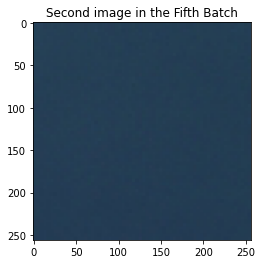

In [15]:
fifth_batch_images=image_generator.next()
plt.imshow(fifth_batch_images[0][1])
plt.title('Second image in the Fifth Batch')
plt.show()

<p>How many images from each class are in the fifth batch?</p>

In [16]:
fifth_batch_images[1]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

<hr>

<h1>Contact Me<h1>

<p>If you have something to say to me please contact me:<p>

*   Twitter: https://twitter.com/Doguilmak
*   Mail address: doguilmak@gmail.com